## installation

In [1]:
pip install easyocr

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\python 37\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\python 37\python.exe -m pip install --upgrade pip' command.



  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl (38.0 MB)


In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\python 37\python.exe -m pip install --upgrade pip' command.


## Import all libraries related to project

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imutils
import easyocr
import pytesseract

## Read the image

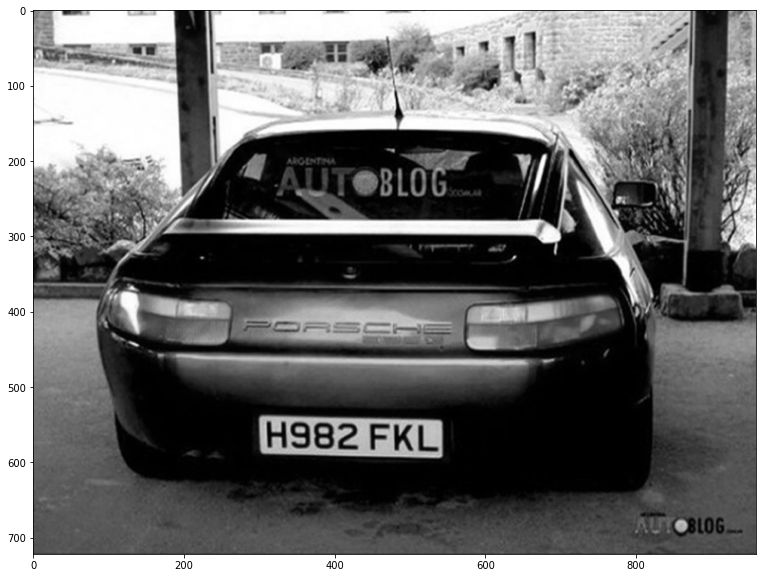

In [4]:
## when we read the image by using open-cv, open-cv read the image in BGR(blue,green,red)format
# we have to change the image in RGB after that change in gray 
# beacuse RGB have 3 channel it takes time in training and gray have only one channel it takes less time as compare to RGB
plt.figure(figsize= (20,10))
img = cv2.imread("image4.jpg")
gray  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

## Apply filter and edge detection

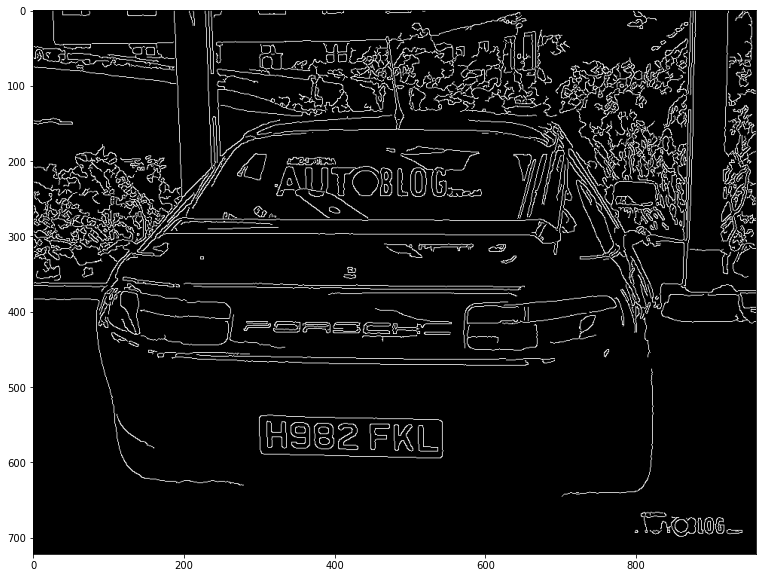

In [5]:
plt.figure(figsize= (20,10))
bfilter = cv2.bilateralFilter(gray , 11, 17,17 )# remove the unwanted details from an image unwanted things get blur
edged   = cv2.Canny(bfilter , 30 ,  200) # only detect the edges that have an intensity gradient more than minimun thres and less than max thres
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))

## Find contour

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #we have to find the contours in the image rtr_free will return the predefined level and chain approx return the shapes if we don't use this then it return the pixel value not shapes 
contours  = imutils.grab_contours(keypoints)
contours  = sorted(contours , key = cv2.contourArea,reverse=True)[:10] #sort the contours in descending order and we pick only first 10 contours 

In [7]:
loc = None
for cont in contours:
    apr = cv2.approxPolyDP(cont,10,True)
    if len(apr) == 4:
        loc = apr
        break

In [8]:
loc

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [9]:
gray.shape

(722, 960)

In [10]:
mask       = np.zeros(gray.shape, np.uint8) # create the numpy array of zeros length of (580,1021) we use uint8 beacuse np.zeros return the float data type
new_image  = cv2.drawContours(mask , [loc], 0,255,-1)
new_image  = cv2.bitwise_and(img,img, mask = mask) # have to change the image in bitwise because machine understand number only

In [11]:
new_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

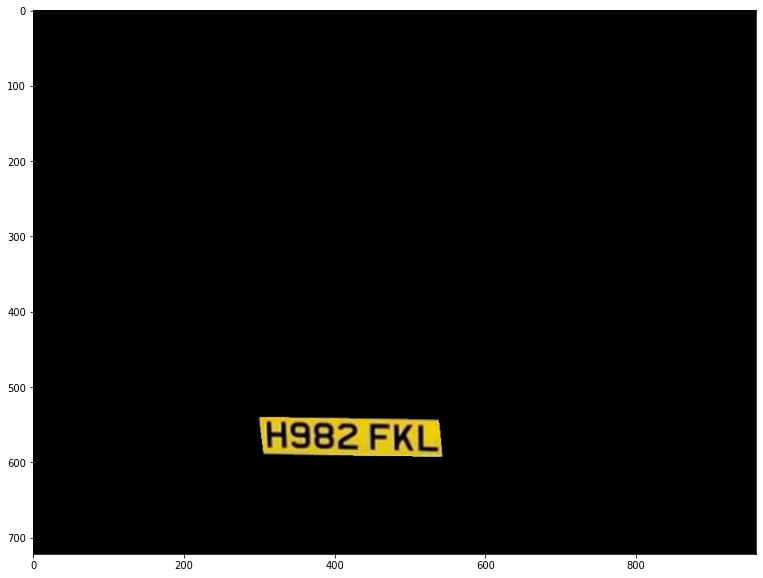

In [12]:
plt.figure(figsize= (20,10))
plt.imshow(cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB))

In [13]:
# extract or crop the number plate from the image 
(x,y) = np.where(mask == 255) # find where the pixel value is 255 and take minimum and maximum from the mask
(x1, y1) = (np.min(x) , np.min(y))
(x2, y2) = (np.max(x) , np.max(y))
cr_image = gray[x1:x2+1 , y1:y2+1]

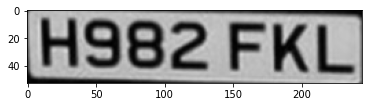

In [14]:
plt.imshow(cv2.cvtColor(cr_image,cv2.COLOR_BGR2RGB))

In [15]:
# read the text from image by using easy ocr
read   = easyocr.Reader(["en"])
result = read.readtext(cr_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778851628141)]

In [16]:
result[0][-2]

'H982 FKL'

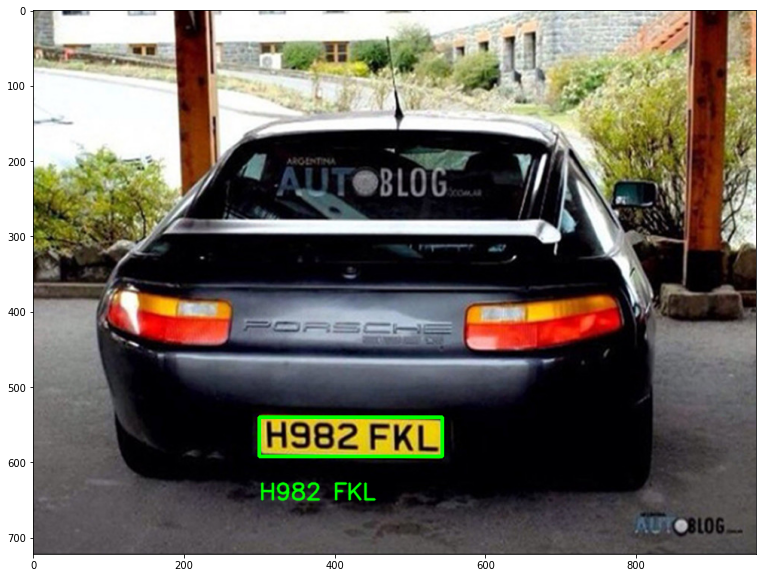

In [17]:
# put the text and create bounding box where the number plate is present in image
plt.figure(figsize= (20,10))
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(apr[0][0][0], apr[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(apr[0][0]), tuple(apr[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


## Detection by using pytesseract

In [18]:
path = r"C:\Program Files\Tesseract-OCR/tesseract.exe"

In [19]:
# pytesseract is not able to recognise the charcter properly
pytesseract.pytesseract.tesseract_cmd = path
text = pytesseract.image_to_string(cr_image)
print(text)

HS982 FKL

